**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading The Dataset**

In [2]:
df = pd.read_csv(r"C:\Users\suraj\OneDrive\Documents\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
#A) Data Manipulation:
#a. Extract the 5th column & store it in ‘customer_5’

In [9]:
customer_5 = df.iloc[:,5]
customer_5.head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [10]:
#b. Extract the 15th column & store it in ‘customer_15’

In [11]:
customer_15 = df.iloc[:,15]

In [12]:
customer_15.head()

0    Month-to-month
1          One year
2    Month-to-month
3          One year
4    Month-to-month
Name: Contract, dtype: object

In [13]:
#c. Extract all the male senior citizens whose Payment Method is Electronic check &
#store the result in ‘senior_male_electronic’

In [14]:
senior_male_electronic=df[(df.gender == 'Male') & (df.PaymentMethod =='Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.9,Yes


In [15]:
#d. Extract all those customers whose tenure is greater than 70 months or their
#Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

In [16]:
customer_total_tenure=df[(df['MonthlyCharges'] > 100) | (df['tenure'] > 70)].head()
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [17]:
#e. Extract all the customers whose Contract is of two years, payment method is Mailed
#check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

In [18]:
two_mail_yes=df[(df.Contract == '2') & (df.PaymentMethod == 'Mailed check') & (df.Churn == 'Yes')]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [19]:
#f. Extract 333 random records from the customer_churndataframe& store the result in
#‘customer_333’

In [20]:
customer_333 = df.sample(333)

In [21]:
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
567,5781-RFZRP,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.50,5357.75,No
1324,0031-PVLZI,Female,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35,Yes
5928,1830-IPXVJ,Female,0,Yes,Yes,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.75,1311.6,No
669,0214-JHPFW,Female,0,Yes,No,70,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),57.80,4039.3,No
2045,7519-JTWQH,Female,0,No,No,69,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.50,7455.45,No


In [22]:
#g. Get the count of different levels from the ‘Churn’ column

In [23]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [24]:
#B) Data Visualization:
#a. Build a bar-plot for the ’InternetService’ column:
#i. Set x-axis label to ‘Categories of Internet Service’
#ii. Set y-axis label to ‘Count of Categories’
#iii. Set the title of plot to be ‘Distribution of Internet Service’
#iv. Set the color of the bars to be ‘orange’

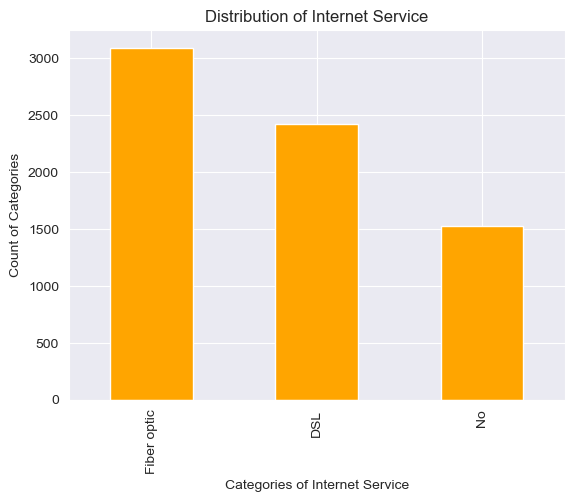

In [25]:
sns.set_style('darkgrid')
df.InternetService.value_counts().plot.bar(color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

In [26]:
#b. Build a histogram for the ‘tenure’ column:
#i. Set the number of bins to be 30
#ii. Set the color of the bins to be ‘green’
#iii. Assign the title ‘Distribution of tenure

In [27]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

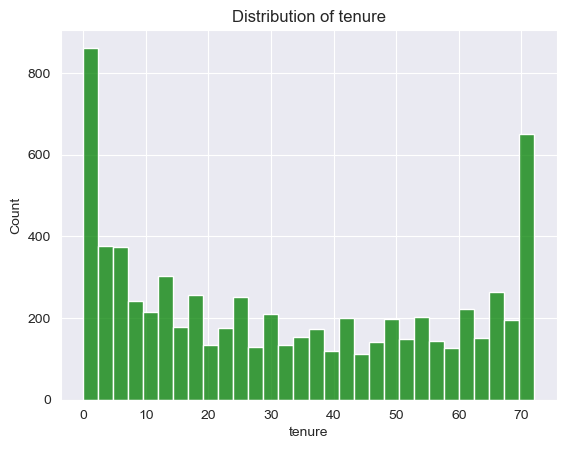

In [28]:
sns.histplot(x='tenure',data=df,bins=30,color='green')
plt.title('Distribution of tenure')
plt.show()

In [29]:
#c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
#the y-axis & ‘tenure’ to the ‘x-axis’:
#i. Assign the points a color of ‘brown’
#ii. Set the x-axis label to ‘Tenure of customer’
#iii. Set the y-axis label to ‘Monthly Charges of customer’
#iv. Set the title to ‘Tenure vs Monthly Charges’

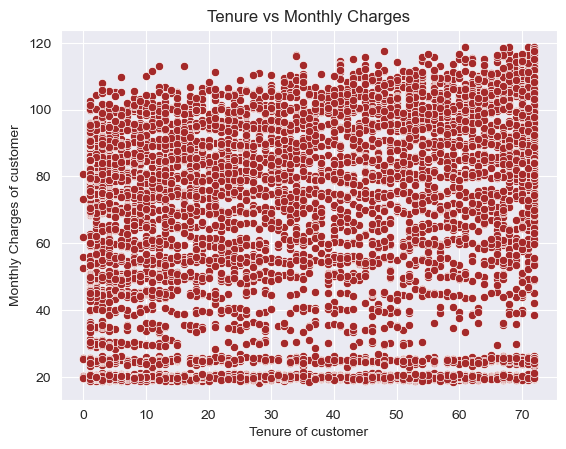

In [30]:
sns.scatterplot(x = 'tenure',y = 'MonthlyCharges',data=df,color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

In [31]:
#d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
#‘Contract’ on the x-axis.

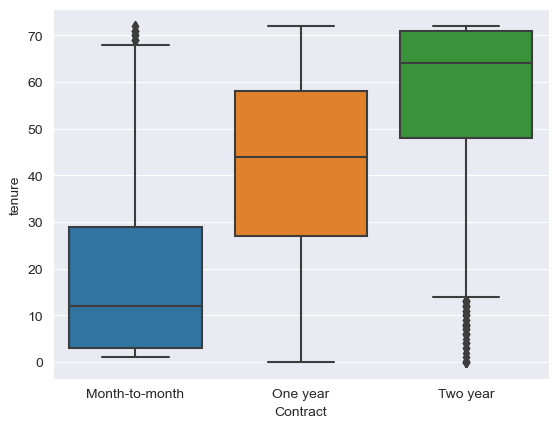

In [32]:
sns.boxplot(x = 'Contract',y = 'tenure',data=df)
plt.show()

**Using Linear Regression**

In [33]:
#C) Linear Regression:
#a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and
#independent variable is ‘tenure’
#i. Divide the dataset into train and test sets in 70:30 ratio.
#ii. Build the model on train set and predict the values on test set
#iii. After predicting the values, find the root mean square error
#iv. Find out the error in prediction & store the result in ‘error’
#v. Find the root mean square error

In [34]:
y = df[['MonthlyCharges']]
x = df[['tenure']]

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.3 , random_state = 42)

In [36]:
x_train.shape,x_test.shape

((4930, 1), (2113, 1))

In [37]:
from sklearn.linear_model import LinearRegression
lr =  LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(x_test)

In [40]:
from sklearn.metrics import r2_score

In [41]:
print("r2_score of models is", r2_score (y_test,y_pred)*100)

r2_score of models is 5.856035027031625


In [42]:
from sklearn.metrics import *

In [43]:
print("Mean Squared Error is ", mean_squared_error(y_test,y_pred))

Mean Squared Error is  845.6091871095867


In [44]:
print("Mean Absolute Error is ",mean_absolute_error(y_test,y_pred ))

Mean Absolute Error is  25.225560821286088


**Using Logistic Regression**

In [45]:
#D) Logistic Regression:
#a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ &
#independent variable is ‘MonthlyCharges’
#i. Divide the dataset in 65:35 ratio
#ii. Build the model on train set and predict the values on test set
#iii. Build the confusion matrix and get the accuracy score

In [46]:
y0 = df[['Churn']]
x0 = df[['MonthlyCharges']]

In [47]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
x0_train,x0_test,y0_train,y0_test = train_test_split(x0,y0 ,test_size=0.35 , random_state = 42)

In [49]:
from sklearn.linear_model import LogisticRegression
lreg =  LogisticRegression()

In [50]:
lreg.fit(x0_train,y0_train)

LogisticRegression()

In [51]:
y0_pred = lreg.predict(x0_test)

In [52]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [53]:
print("Accuracy of Model is ",accuracy_score(y0_test,y0_pred))

Accuracy of Model is  0.7287104622871047


In [54]:
cm0 = confusion_matrix(y0_test,y0_pred)
cm0

array([[1797,    0],
       [ 669,    0]], dtype=int64)

<AxesSubplot:>

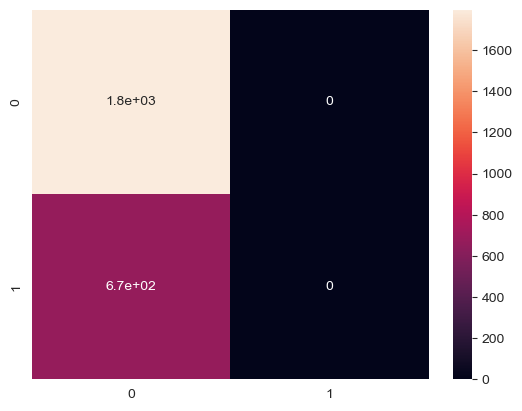

In [55]:
sns.heatmap(cm0,annot=True)

In [56]:
#b. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
#independent variables are ‘tenure’ & ‘MonthlyCharges’
#i. Divide the dataset in 80:20 ratio
#ii. Build the model on train set and predict the values on test set
#iii. Build the confusion matrix and get the accuracy score

In [57]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [59]:
y1 = df.Churn
x1 = df[['tenure','MonthlyCharges']]

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
df.Churn  = le.fit_transform(df.Churn)

In [62]:
from sklearn.preprocessing import StandardScaler
ss =  StandardScaler()

In [63]:
df[['tenure','MonthlyCharges']] = ss.fit_transform(df[['tenure','MonthlyCharges']])

In [64]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state = 42)

In [65]:
x1_train.shape,x1_test.shape

((5634, 2), (1409, 2))

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [67]:
lr.fit(x1_train,y1_train)

LogisticRegression()

In [68]:
y1_pred = lr.predict(x1_test)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Model is ",accuracy_score(y1_test,y1_pred))

Accuracy of Model is  0.7977288857345636


In [70]:
cm1 = confusion_matrix(y1_test,y1_pred)
cm1

array([[944,  92],
       [193, 180]], dtype=int64)

<AxesSubplot:>

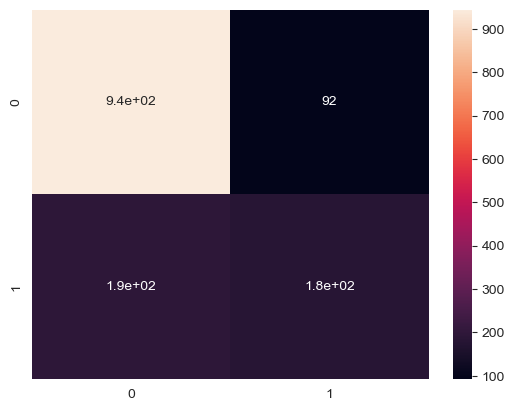

In [71]:
sns.heatmap(cm1,annot=True)

**Using Decision Tree**

In [72]:
#E) Decision Tree:
#a. Build a decision tree model where dependent variable is ‘Churn’ & independent
#variable is ‘tenure’
#i. Divide the dataset in 80:20 ratio
#ii. Build the model on train set and predict the values on test set
#iii. Build the confusion matrix and calculate the accuracy

In [73]:
x2 = df[['tenure']]
y2 = df[['Churn']]

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
model =  DecisionTreeClassifier()

In [76]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2 , test_size=0.2,random_state = 42)

In [77]:
model.fit(x2_train,y2_train)

DecisionTreeClassifier()

In [78]:
y2_pred = model.predict(x2_test)

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [80]:
print("Accuracy of Model is ", accuracy_score(y2_test,y2_pred))

Accuracy of Model is  0.7572746628814763


In [81]:
cm2 = confusion_matrix(y2_test,y2_pred)
cm2

array([[951,  85],
       [257, 116]], dtype=int64)

<AxesSubplot:>

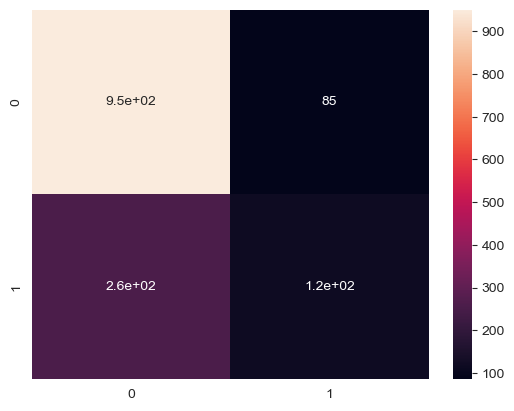

In [82]:
sns.heatmap(cm2,annot=True)

**Using Random Forest**

In [83]:
#F) Random Forest:
#a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
#variables are ‘tenure’ and ‘MonthlyCharges’
#i. Divide the dataset in 70:30 ratio
#ii. Build the model on train set and predict the values on test set
#iii. Build the confusion matrix and calculate the accuracy

In [84]:
y3 = df.Churn
x3 = df[['tenure','MonthlyCharges']]

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()

In [87]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3 , test_size=0.3,random_state = 42)

In [88]:
model1.fit(x3_train,y3_train)

RandomForestClassifier()

In [89]:
y3_pred = model1.predict(x3_test)

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [91]:
print("Accuracy of Model is", accuracy_score(y3_test,y3_pred))

Accuracy of Model is 0.7605300520586843


In [92]:
cm3 = confusion_matrix(y3_test,y3_pred)
cm3

array([[1343,  196],
       [ 310,  264]], dtype=int64)

<AxesSubplot:>

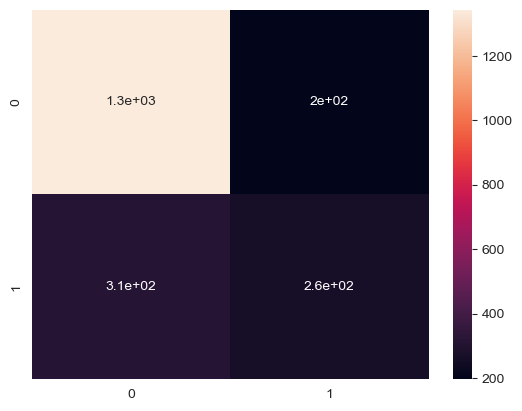

In [93]:
sns.heatmap(cm3,annot=True)